<a href="https://colab.research.google.com/github/anooprnathblq/DSA_Python/blob/main/Anoop_Assign_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/4.car_age_price.csv')
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

There is  no null values/missing values .Oulier/duplicate elimination and Encoding/Sampling will done as  asepearte case to see the effects

In [ ]:
df.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


Corr=0.77 shows that there is  a strong positive correlation between Year and Price

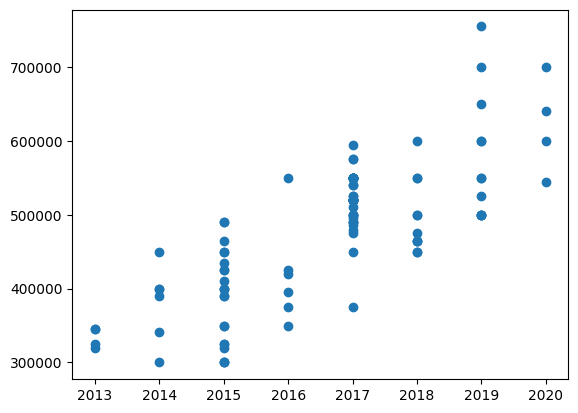

In [ ]:
#to get a visual represenattion of the distribution of the price over years
plt.scatter(df['Year'],df['Price'])

In [ ]:
#Defining features and labels
X=df[['Year']]
y=df['Price']

In [ ]:
#Find the best linear relationship between year and price
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_orig=lr.fit(X,y)

In [ ]:
#checking the reg coeffient(m) and y intercept(b) for the equation of  a line defining the relation
m_orig=model_orig.coef_
b_orig=model_orig.intercept_
print('reg coeffient =', m_orig,'and y-intercept=',b_orig)

reg coeffient = [43453.37988793] and y-intercept= -87147246.05488417


In [ ]:
#To find a model for predictiong the relation between two going for regression

In [ ]:
#train test split with 20% data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(89, 1)
(23, 1)


In [ ]:
#Model creationnusing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [ ]:
#checking the reg coeffient(m) and y intercept(b) of the model learned from train data
m=model.coef_
b=model.intercept_
print('reg coeffient =', m,'and y-intercept=',b)


reg coeffient = [47608.56780808] and y-intercept= -95520922.49198586


In [ ]:
#predicting the y values with the model created
y_pred=model.predict(X_test)

In [ ]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

4326906256.829671

In [ ]:
r_score=r2_score(y_test,y_pred)
r_score

0.36759313425902185

From the r^2 value of r=0.36 ,the model seems to be moderate fit

In [ ]:
#checking value for year 2022
check=model.predict([[2022]])
check

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

In [ ]:
#Model creationnusing Lasso Regression
from sklearn.linear_model import Lasso
lo=Lasso()
model_lo=lo.fit(X_train,y_train)

In [ ]:
#predicting the y values with the Lasso model created
y_pred_lo=model_lo.predict(X_test)

In [ ]:
mse_lo=mean_squared_error(y_test,y_pred_lo)
mse_lo

4326859771.015669

In [ ]:
r_score_lo=r2_score(y_test,y_pred_lo)
r_score_lo

0.3675999284778446

r^2value same as that of Linear Regression

**Trying Encoding to see any difference is there**

In [ ]:
#Encoding the year
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
X_enc=encoder.fit_transform(X)


In [ ]:
#Find the best linear relationship between year and price after encoding
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_enc=lr.fit(X_enc,y)

In [ ]:
#checking the reg coeffient(m) and y intercept(b) for the equation of  a line defining the relation
m_enc=model_enc.coef_
b_enc=model_enc.intercept_
print('reg coeffient =', m_enc,'and y-intercept=',b_enc)

reg coeffient = [43453.37988793] and y-intercept= 324407.6595184007


In [ ]:
#train test split with 20% data for testing
from sklearn.model_selection import train_test_split
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)

In [ ]:
#Model creationnusing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_enco=lr.fit(X_enc_train,y_enc_train)

In [ ]:
#predicting the y values with the model created
y_enc_pred=model_enco.predict(X_enc_test)

In [ ]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse_enc=mean_squared_error(y_enc_test,y_enc_pred)
mse_enc

4326906256.829962

In [ ]:
r_enc_score=r2_score(y_enc_test,y_enc_pred)
r_enc_score

0.36759313425897944

In [ ]:
#checking value for year 2022
check_enc=model_enco.predict([[9]])
check_enc

array([743601.61594505])

No change observed in r^2 value or predicted value after encoding.only change observed is in the y-intercept

**Trying outlier elimination and duplication removal and see any effect is there**





In [ ]:
#Outlier Elimination

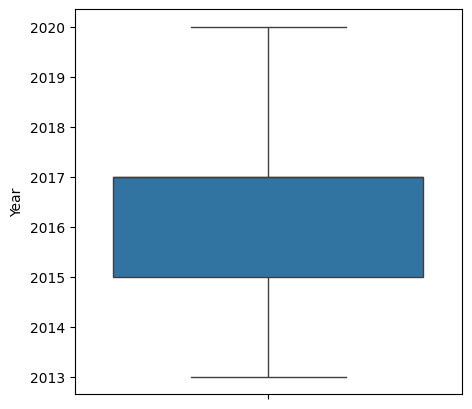

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df['Year'] )
plt.show()

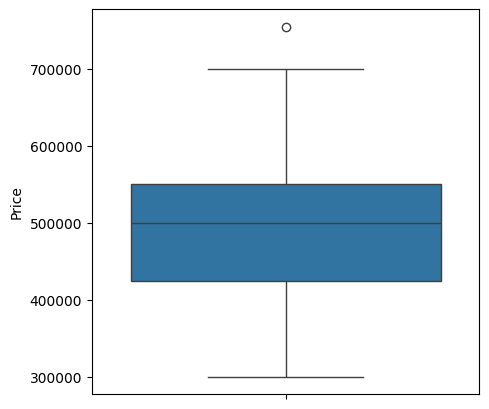

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df['Price'] )
plt.show()

In [ ]:
#Clipping one outlier in Price

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)         ##Finding Q1,Q3,IQR
IQR = Q3 - Q1


In [ ]:
df['Price'] = df['Price'].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR)

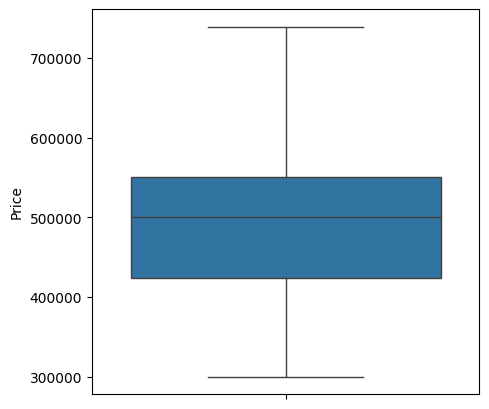

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data = df['Price'] )  #Outliers removed
plt.show()

Removal of duplictaes:

In [ ]:
df.shape

(112, 2)

In [ ]:
df1=df.drop_duplicates()

In [ ]:
df1.shape

(58, 2)

In [ ]:
df1.describe()

,Year,Price
count,58.000000,58.000000
mean,2016.568966,474178.827586
std,1.902096,105287.673578
min,2013.000000,300000.000000
25%,2015.000000,397000.000000
50%,2017.000000,475000.000000
75%,2018.000000,543750.000000
max,2020.000000,739375.000000


In [ ]:
X_nodup=df1[['Year']]
y_nodup=df1['Price']

In [ ]:
X_nodup_train, X_nodup_test, y_nodup_train, y_nodup_test = train_test_split(X_nodup, y_nodup, test_size=0.2, random_state=42)
model_nodup=lr.fit(X_nodup_train,y_nodup_train)
y_nodup_pred=model_nodup.predict(X_nodup_test)

In [ ]:
mse_nodup=mean_squared_error(y_nodup_test,y_nodup_pred)
mse_nodup

4572973527.050687

In [ ]:
r_nodup_score=r2_score(y_nodup_test,y_nodup_pred)  ##better r value after reemoving duplicates
r_nodup_score

0.5957592462302933

r^2 value changes to 0.59 ,which indicates the model is good fit(chnage from earlier moderate fit)

In [ ]:
#checking value for year 2022
check_nodup=model_nodup.predict([[2022]])
check_nodup

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([715981.11774194])

As the model seems to be a good fit,the predicted value will be better than that predicted by the moderate model